Importing Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import urllib
import glob
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import metrics
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


In [3]:
url = 'https://raw.githubusercontent.com/lavsz/dsc-mod-2-project-v2-1-onl01-dtsc-pt-052620/master/kc_house_data.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Creating Relevant Subsets 

Subsets Based on Price Tiers (Bottom, Middle, Top)

In [6]:
df_x = df[(df.price >= 78000) & (df.price <= 300000)]

In [7]:
df_y = df[(df.price >= 300001) & (df.price <= 800000)]

In [8]:
df_z = df[(df.price >= 800001) & (df.price <= 7700000)]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
#Checking for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [11]:
with pd.option_context('display.max_columns', 40):
    print(df.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825    

In [12]:
# 33 bedrooms seems very odd and need to check out the size of the house
bed_33 = df[df.bedrooms == 33]
bed_33

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [248]:
# Based on the number of bathrooms, living sqft, it is definitely a typo
# The value will be corrected to 3 instead
df.bedrooms = df.bedrooms.replace({33: 3})
df_x.bedrooms = df_x.bedrooms.replace({33: 3})
df_y.bedrooms = df_y.bedrooms.replace({33: 3})
df_z.bedrooms = df_z.bedrooms.replace({33: 3})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe02ec09a10>,
      dtype=object)

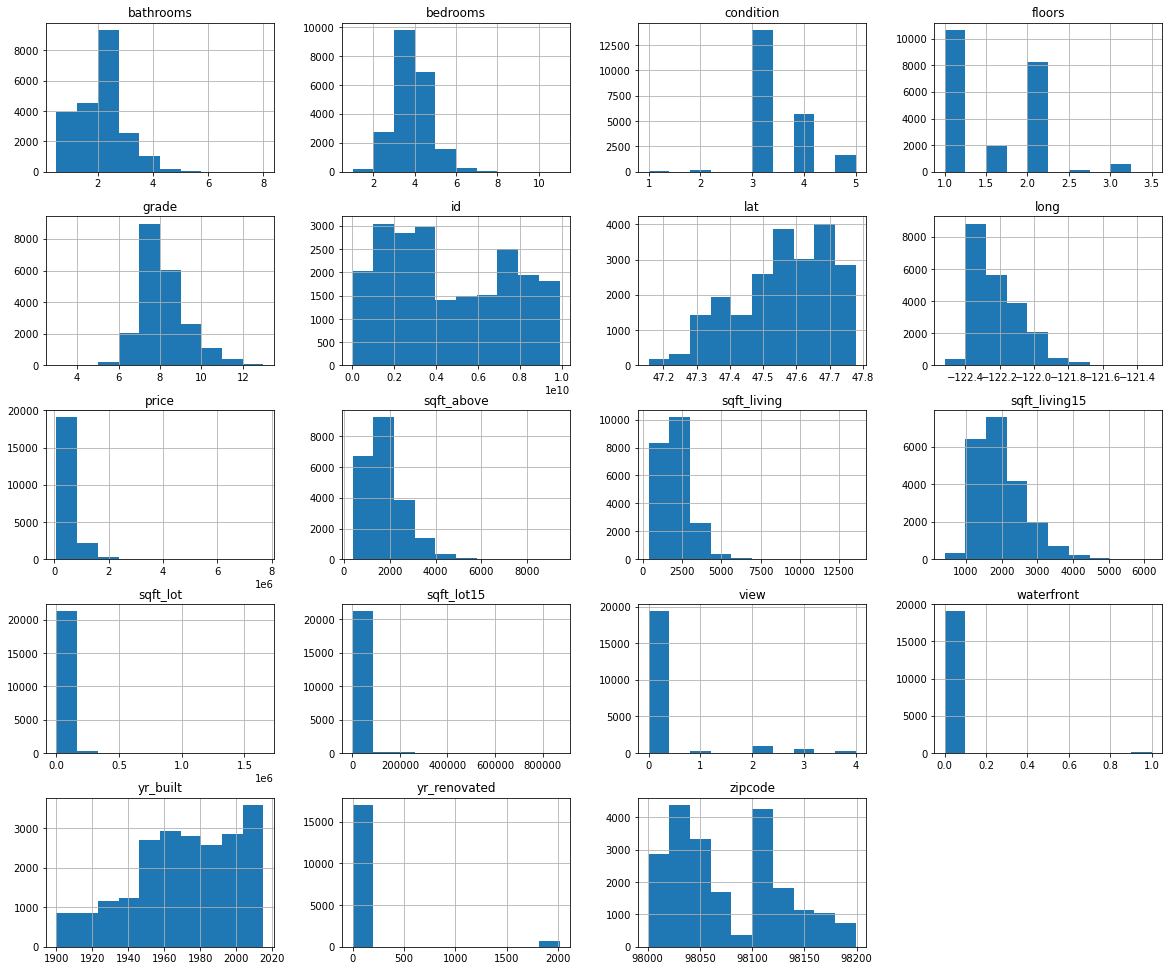

In [14]:
## Use histograms to find other outliers:
df.hist(figsize=(20,17))

In [15]:
# Are there repeating IDs?
df.id.nunique()

21420

In [16]:
# Unique ID values are less than the total entries
# There are either duplicate entries 
# Or the same house was return to the market within a short period of time
ids = df.id
duplicates = df[ids.isin(ids[ids.duplicated()])].sort_values(by=["id"])
duplicates.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,4/22/2015,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,9/16/2014,280000.0,6,3.00,2400,9373,2.0,NaN,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,10/16/2014,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,4/24/2015,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,NaN,98055,47.4840,-122.211,1480,6969
11422,109200390,10/20/2014,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
11421,109200390,8/20/2014,245000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
12406,123039336,12/8/2014,244900.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,NaN,98106,47.5138,-122.364,1180,8244
12405,123039336,6/11/2014,148000.0,1,1.00,620,8261,1.0,0.0,0.0,...,5,620,0.0,1939,0.0,98106,47.5138,-122.364,1180,8244
7786,251300110,1/14/2015,358000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017
7785,251300110,7/31/2014,225000.0,3,2.25,2510,12013,2.0,0.0,0.0,...,8,2510,0.0,1988,0.0,98003,47.3473,-122.314,1870,8017


In [17]:
# Find out if a house was on the market for more than twice
duplicates.id.value_counts()

795000620     3
8651402750    2
5536100020    2
7387500235    2
9238500040    2
             ..
2143700830    2
3271300955    2
1901600090    2
3323059027    2
2023049218    2
Name: id, Length: 176, dtype: int64

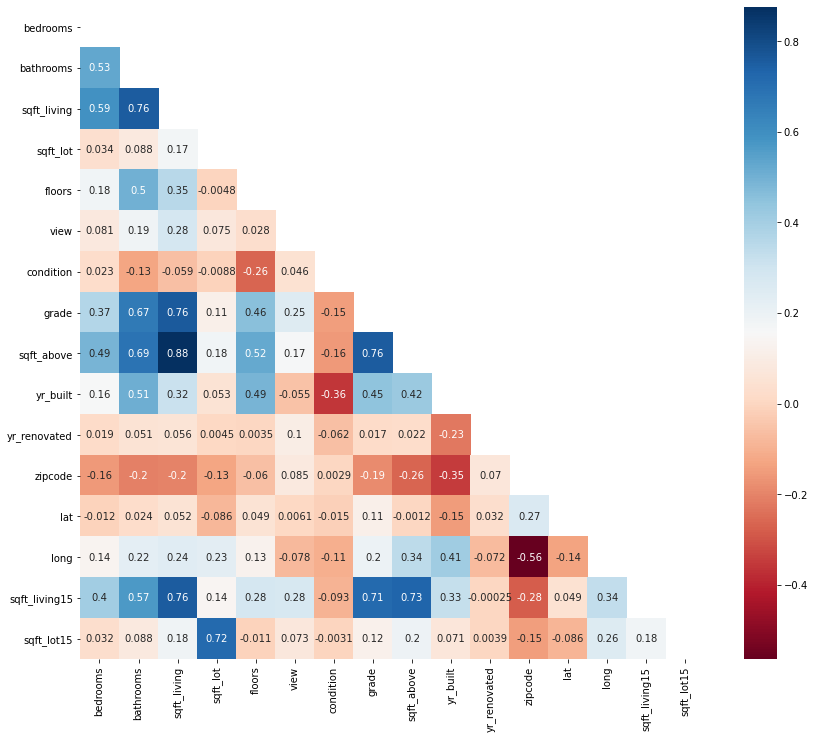

In [18]:
plt.figure(figsize=(14,12))
df_var = df.drop(['price', 'id', 'waterfront'], axis=1)
corr = df_var.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask,
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='RdBu', annot = True)
# 0.7 is a threshold

## Initial Look at DFs

Preliminary Analysis 

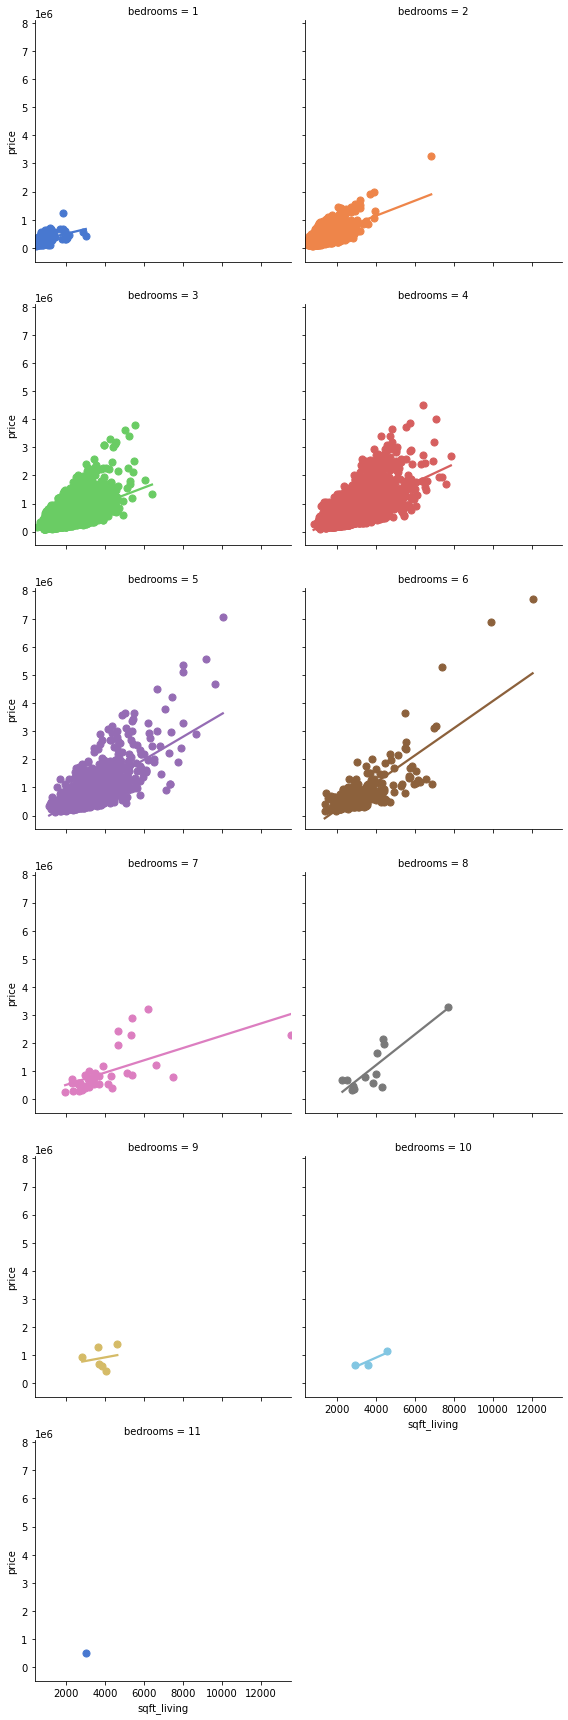

In [19]:
#1 of 2, Analyzing Square Foot Living and Bedrooms
sns.lmplot(x="sqft_living", y="price", col="bedrooms", hue="bedrooms", data=df,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})

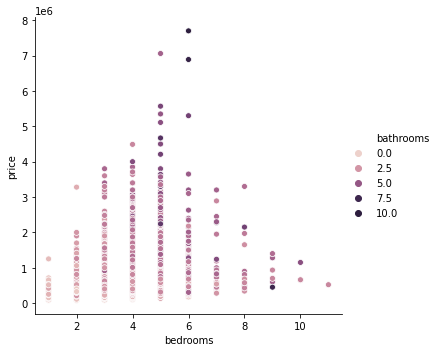

In [267]:
#Another Preliminary Analysis
#2 of 2, Checking Bedrooms and Bathrooms
sns.relplot(x="bedrooms", y="price", hue="bathrooms", data=df)

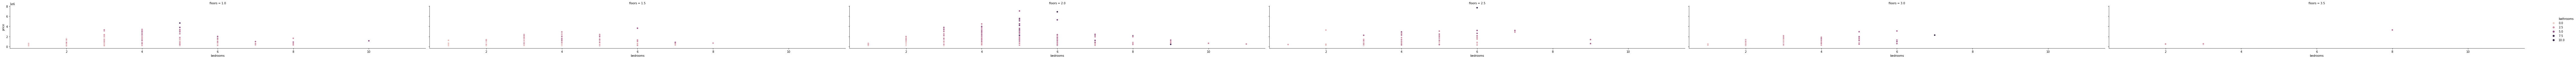

In [266]:
# change figsize
sns.relplot(x="bedrooms", y="price", hue="bathrooms",
            col="floors", data=df)

## OLS Analysis for Master DF and Subsets

In [255]:
#Creating a function to repeat across DFs
def make_ols(df, columns_to_use, columns_to_drop=None, target='price', add_constant=False):
    if columns_to_drop:
        columns_to_drop.append(target)
        X = df.drop(columns=columns_to_drop)
    else:
        X = df[columns_to_use]
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X)
    res = ols.fit()
    display(res.summary())
    return res


def make_sklearn_ols():
    return 

Based on VIF scores, the below features (Bedrooms, Floors, and SQFT_Lot) had the highest impact on RSquared

In [104]:
#Picking Features with the Least Multicollinearity
bottom_tier = make_ols(df_x, columns_to_use=[ 'bedrooms', 'floors', 'sqft_lot'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                          2.675e+04
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:31:50   Log-Likelihood:                         -56395.
No. Observations:                4561   AIC:                                  1.128e+05
Df Residuals:                    4558   BIC:                                  1.128e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
bedrooms    4.742e+04    740.641     64.032      0.000     4.6e+04    4.89e+04
floors      7.012e+04   1731.218     40.504      0.000    6.67e+04    7.35e+04
sqft_lot       0.2762      0.035      7.822      0.000       0.207       0.345
==============================================================================
Omnibus:                       48.054   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.808
Skew:                          -0.205   Prob(JB):                     2.07e-12
Kurtosis:                       3.339   Cond. No.                     5.72e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

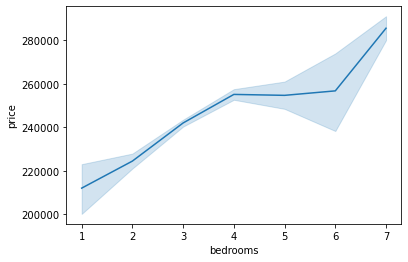

In [24]:
ax = sns.lineplot(x="bedrooms", y="price", data=df_x)

Based on VIF scores, the below features (SQFT_Living, Floors, and SQFT_Lot) had the highest impact on RSquared

In [86]:
#Picking Features with the Least Multicollinearity
mid_tier = make_ols(df_y, columns_to_use=['sqft_living', 'floors', 'sqft_lot'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          5.078e+04
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:06:45   Log-Likelihood:                     -1.8795e+05
No. Observations:               14093   AIC:                                  3.759e+05
Df Residuals:                   14090   BIC:                                  3.759e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   158.7119      1.516    104.703      0.000     155.741     161.683
floors       9.989e+04   1958.091     51.015      0.000    9.61e+04    1.04e+05
sqft_lot        0.0983      0.031      3.145      0.002       0.037       0.160
==============================================================================
Omnibus:                       18.208   Durbin-Watson:                   1.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.224
Skew:                          -0.060   Prob(JB):                     0.000182
Kurtosis:                       2.879   Cond. No.                     6.77e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

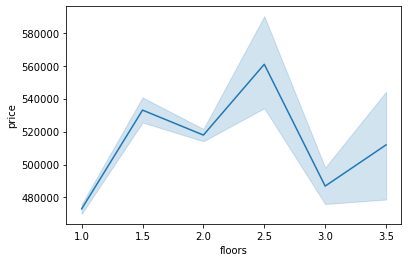

In [242]:
ax = sns.lineplot(x="floors", y="price", data=df_y)

Based on VIF scores, the below features (Bedrooms, SQFT_Living, and SQFT_LOT) had the highest impact on RSquared

In [203]:
#Picking Features with the Least Multicollinearity
top_tier = make_ols(df_z, columns_to_use=['sqft_living', 'bedrooms', 'sqft_lot'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.885
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              7568.
Date:                Mon, 07 Sep 2020   Prob (F-statistic):                        0.00
Time:                        16:38:09   Log-Likelihood:                         -42488.
No. Observations:                2943   AIC:                                  8.498e+04
Df Residuals:                    2940   BIC:                                  8.500e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   344.8750      8.265     41.727      0.000     328.669     361.081
bedrooms     1.243e+04   7061.097      1.760      0.079   -1419.289    2.63e+04
sqft_lot       -0.9472      0.142     -6.653      0.000      -1.226      -0.668
==============================================================================
Omnibus:                     1008.022   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6291.182
Skew:                           1.482   Prob(JB):                         0.00
Kurtosis:                       9.521   Cond. No.                     5.45e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

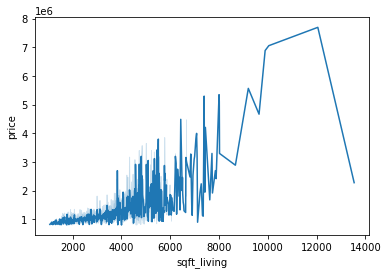

In [241]:
ax = sns.lineplot(x="sqft_living", y="price", data=df_z)

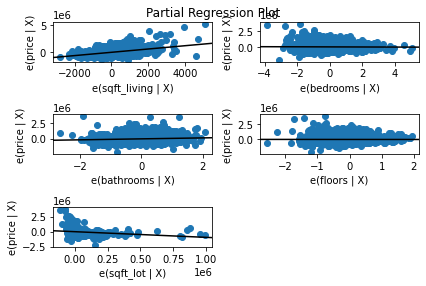

In [32]:
fig1 = sm.graphics.plot_partregress_grid(top_tier)
fig1.tight_layout(pad=1.0)

# Multicollinearity Analysis and MSE Features

In [33]:
#Master DF
columns = df.drop(columns=['id', 'date', 'view', 'waterfront', 'zipcode', 'lat', 'long', 'sqft_living15',
                           'sqft_lot15', 'yr_renovated', 'yr_built', 'sqft_basement', 
                          'sqft_above', 'grade', 'condition']).columns
columns = ['floors', 'sqft_living']
vif_scores = []
for column in columns:
    target_column = column
    columns_to_use = [c for c in columns if c!=target_column]
    X = df[columns_to_use]
    y = df[target_column]

    ols = sm.OLS(y, X)
    res = ols.fit()
    r2 = res.rsquared
    vif = 1 / (1 - r2) # vif should be under 3 or 5 or 10
    vif_scores.append((column, vif))
vif_scores

[('floors', 5.756916163755017), ('sqft_living', 5.756916163755017)]

In [110]:
#Bottom Tier Subset
columns = df_x.drop(columns=['id', 'date', 'view', 'waterfront', 'zipcode', 'lat', 'long', 'sqft_living15',
                           'sqft_lot15', 'yr_renovated', 'yr_built', 'sqft_basement', 
                          'sqft_above', 'grade', 'condition']).columns
columns = ['floors', 'sqft_lot', 'bedrooms' ]
vif_scores = []
for column in columns:
    target_column = column
    columns_to_use = [c for c in columns if c!=target_column]
    X = df_x[columns_to_use]
    y = df_x[target_column]

    ols = sm.OLS(y, X)
    res = ols.fit()
    r2 = res.rsquared
    vif = 1 / (1 - r2) # vif should be under 3 or 5 or 10
    vif_scores.append((column, vif))
vif_scores

[('floors', 7.317404730367823),
 ('sqft_lot', 1.1736034401630693),
 ('bedrooms', 7.487313777953536)]

In [113]:
#Middle Tier Subset
columns = df_y.drop(columns=['id', 'date', 'view', 'waterfront', 'zipcode', 'lat', 'long', 'sqft_living15',
                           'sqft_lot15', 'yr_renovated', 'yr_built', 'sqft_basement', 
                          'sqft_above', 'grade', 'condition']).columns
columns = ['floors', 'sqft_living', 'sqft_lot', ]
vif_scores = []
for column in columns:
    target_column = column
    columns_to_use = [c for c in columns if c!=target_column]
    X = df_y[columns_to_use]
    y = df_y[target_column]

    ols = sm.OLS(y, X)
    res = ols.fit()
    r2 = res.rsquared
    vif = 1 / (1 - r2) # vif should be under 3 or 5 or 10
    vif_scores.append((column, vif))
vif_scores

[('floors', 6.93227936646559),
 ('sqft_living', 15.185948727204677),
 ('sqft_lot', 1.1706666134810868),
 ('bedrooms', 14.446040948749097)]

Choosing Final Features for Best MSE

In [184]:
#Top Tier Subset
#Choosing Final Features to Reduce MSE
columns = df_z.drop(columns=['id', 'date', 'view', 'waterfront', 'zipcode', 'lat', 'long', 'sqft_living15',
                           'sqft_lot15', 'yr_renovated', 'yr_built', 'sqft_basement', 
                          'sqft_above', 'grade', 'condition']).columns
columns = ['sqft_living', 'bedrooms', 'floors']
vif_scores = []
for column in columns:
    target_column = column
    columns_to_use = [c for c in columns if c!=target_column]
    X = df_z[columns_to_use]
    y = df_z[target_column]

    ols = sm.OLS(y, X)
    res = ols.fit()
    r2 = res.rsquared
    vif = 1 / (1 - r2) # vif should be under 3 or 5 or 10
    vif_scores.append((column, vif))
vif_scores

[('sqft_living', 13.380973613649589),
 ('bedrooms', 15.70545152563021),
 ('floors', 11.541555423769877)]

Test/Train Split and MSE

In [185]:
reg = LinearRegression().fit(X, y)

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [187]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [188]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [189]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

2354 589 2354 589


In [190]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: 0.21454448856212344
Test Mean Squarred Error: 0.22420846848733914


In [191]:
y_pred = linreg.predict(X_test)

In [192]:
print(metrics.mean_squared_error(y_test, y_pred))

0.22420846848733914


In [ ]:
QQ Plot Analysis

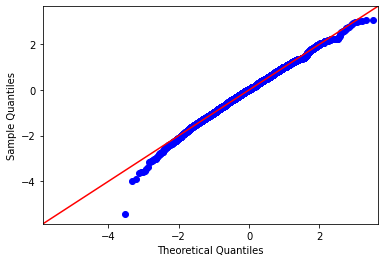

In [224]:
residuals = bottom_tier.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

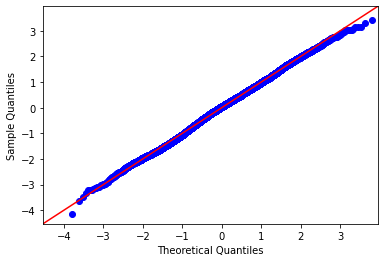

In [227]:
residuals1 = mid_tier.resid
fig = sm.graphics.qqplot(residuals1, dist=stats.norm, line='45', fit=True)
fig.show()

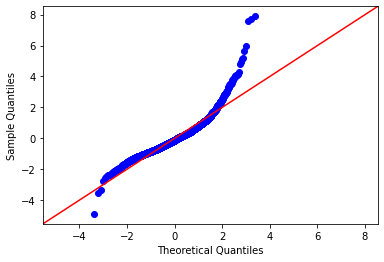

In [226]:
residuals2 = top_tier.resid
fig = sm.graphics.qqplot(residuals1, dist=stats.norm, line='45', fit=True)
fig.show()

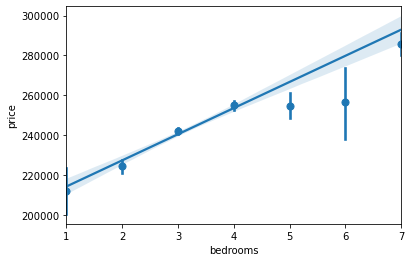

In [233]:
ax = sns.regplot(x="bedrooms", y="price", data=df_x,
                 x_estimator=np.mean)

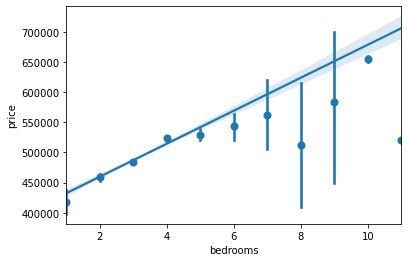

In [252]:
ax = sns.regplot(x="bedrooms", y="price", data=df_y,
                 x_estimator=np.mean)

In [ ]:
ax = sns.regplot(x="bedrooms", y="price", data=df_y,
                 x_estimator=np.mean)